# LSTM과 GRU 셀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
# 데이터 세트 imdb import
from sklearn.model_selection import train_test_split
# train_test_split import

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
# num_words=500으로 데이터셋에서 가장 자주 등장하는 단어 500개만 사용

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
# 훈련 세트와 검증 세트를 8:2 비율로 나눔

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad_sequences import
train_seq = pad_sequences(train_input, maxlen=100)
# max_len=100으로 설정하여 train_input의 길이를 100으로 맞춤
val_seq = pad_sequences(val_input, maxlen=100)
# max_len=100으로 설정하여 val_input의 길이를 100으로 맞춤

In [3]:
from tensorflow import keras
# keras import
model = keras.Sequential()
# Sequential 객체 model 생성
model.add(keras.layers.Embedding(500, 16, input_length=100))
# model에 Embedding 층 추가, 단어 사전의 크기는 500, 임베딩 벡터의 크기는 16, input_length=100으로 설정
model.add(keras.layers.LSTM(8))
# model에 LSTM 층 추가
model.add(keras.layers.Dense(1, activation='sigmoid'))
# model에 출력 층 추가, 이진 분류이기 때문에 1개의 뉴런과 시그모이드 활성화 함수를 사용
model.summary()
# model 요약 내용 출력

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# RMSprop의 학습률을 0.0001로 지정

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy']으로 설정

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
# ModelCheckpoint 콜백 사용

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# EarlyStopping 콜백 사용, patience=3으로 설정

history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# epoch=100, batch_size=64로 설정하고 훈련

Epoch 1/100
313/313 [==============================] - 14s 20ms/step - loss: 0.6929 - accuracy: 0.5129 - val_loss: 0.6921 - val_accuracy: 0.5416
Epoch 2/100
  9/313 [..............................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5434

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 12ms/step - loss: 0.6912 - accuracy: 0.5659 - val_loss: 0.6901 - val_accuracy: 0.6002
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6884 - accuracy: 0.6091 - val_loss: 0.6865 - val_accuracy: 0.6234
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6830 - accuracy: 0.6328 - val_loss: 0.6791 - val_accuracy: 0.6440
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6698 - accuracy: 0.6607 - val_loss: 0.6574 - val_accuracy: 0.6790
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6173 - accuracy: 0.7084 - val_loss: 0.5864 - val_accuracy: 0.7098
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5707 - accuracy: 0.7269 - val_loss: 0.5627 - val_accuracy: 0.7324
Epoch 8/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5475 - accuracy: 0.7451 - val_loss: 0.5426 - val_accuracy: 0.7470
Epoch 9/

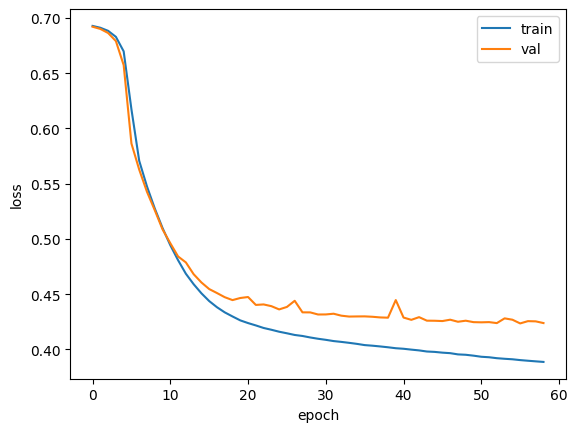

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 훈련 세트와 검증 세트 손실 그래프 출력

## 순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()
# Sequential 클래스 객체 model2 생성
model2.add(keras.layers.Embedding(500, 16, input_length=100))
# model2에 Embedding층 추가, 단어 사전의 크기는 500, 임베딩 벡터의 크기는 16, input_length=100으로 설정
model2.add(keras.layers.LSTM(8, dropout=0.3))
# mdoel2에 LSTM 층 추가, dropout=0.3으로 설정해서 30%의 입력을 드롭아웃
model2.add(keras.layers.Dense(1, activation='sigmoid'))
# model2에 출력층 추가, 이진 분류이기 때문에 1개의 뉴런과 시그모이드 활성화 함수를 사용

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# RMSprop의 학습률을 0.0001로 지정

model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy']으로 설정

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
# ModelCheckpoint 콜백 사용

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# EarlyStopping 콜백 사용, patience=3으로 설정

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# epoch=100, batch_size=64로 설정하고 훈련

Epoch 1/100
313/313 [==============================] - 8s 16ms/step - loss: 0.6930 - accuracy: 0.5046 - val_loss: 0.6923 - val_accuracy: 0.5430
Epoch 2/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6910 - accuracy: 0.5691 - val_loss: 0.6897 - val_accuracy: 0.6102
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6859 - accuracy: 0.6262 - val_loss: 0.6792 - val_accuracy: 0.6634
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6590 - accuracy: 0.6683 - val_loss: 0.6355 - val_accuracy: 0.6832
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6213 - accuracy: 0.6916 - val_loss: 0.6055 - val_accuracy: 0.7114
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5956 - accuracy: 0.7132 - val_loss: 0.5802 - val_accuracy: 0.7300
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5710 - accuracy: 0.7342 - val_loss: 0.5607 - val_accuracy: 0.

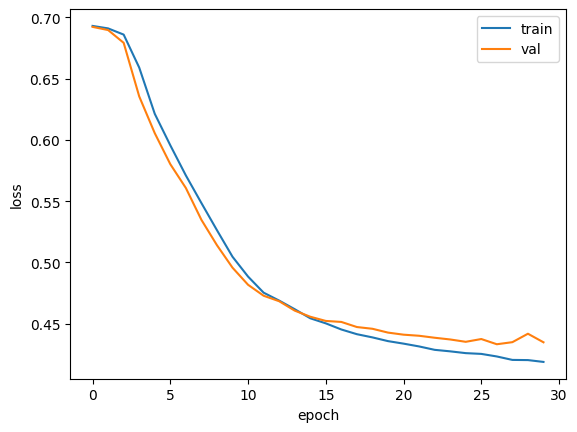

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 훈련 세트와 검증 세트 손실 그래프 출력

## 2개의 층을 연결하기

In [9]:
model3 = keras.Sequential()
# Sequential 클래스 객체 model3 생성
model3.add(keras.layers.Embedding(500, 16, input_length=100))
# model3에 Embedding 층 추가, 단어 사전의 크기는 500, 임베딩 벡터의 크기는 16, input_length=100으로 설정
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
# model3에 LSTM 층 추가, dropout=0.3으로 설정해서 30%의 입력을 드롭아웃, return_sequences=True로 해서 모든 타임스텝의 은닉 상태를 출력
model3.add(keras.layers.LSTM(8, dropout=0.3))
# model3에 LSTM 층 추가, dropout=0.3으로 설정해서 30%의 입력을 드롭아웃
model3.add(keras.layers.Dense(1, activation='sigmoid'))
# model3에 출력 층 추가, 이진 분류이기 때문에 1개의 뉴런과 시그모이드 활성화 함수를 사용
model3.summary()
# model3 요약 내용 출력

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# RMSprop의 학습률을 0.0001로 지정

model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy']으로 설정

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
# ModelCheckpoint 콜백 사용

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# EarlyStopping 콜백 사용, patience=3으로 설정

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# epoch=100, batch_size=64로 설정하고 훈련

Epoch 1/100
313/313 [==============================] - 11s 23ms/step - loss: 0.6929 - accuracy: 0.5124 - val_loss: 0.6926 - val_accuracy: 0.5174
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6911 - accuracy: 0.5667 - val_loss: 0.6884 - val_accuracy: 0.6398
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6783 - accuracy: 0.6443 - val_loss: 0.6583 - val_accuracy: 0.6760
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6198 - accuracy: 0.6901 - val_loss: 0.5862 - val_accuracy: 0.7080
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5677 - accuracy: 0.7214 - val_loss: 0.5507 - val_accuracy: 0.7338
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5407 - accuracy: 0.7424 - val_loss: 0.5271 - val_accuracy: 0.7492
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5205 - accuracy: 0.7551 - val_loss: 0.5147 - val_accuracy

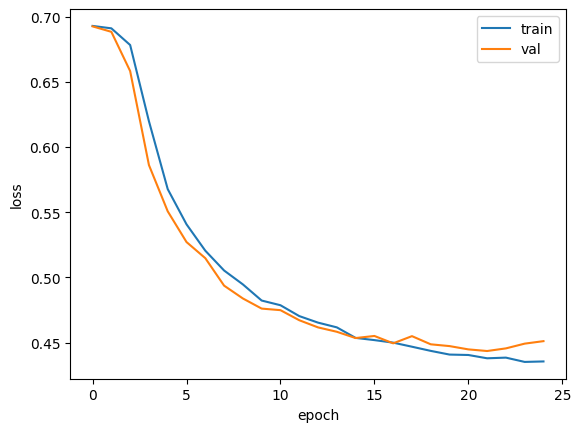

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 훈련 세트와 검증 세트 손실 그래프 출력

## GRU 신경망 훈련하기

In [12]:
model4 = keras.Sequential()
# Sequential 클래스 객체 model4 생성
model4.add(keras.layers.Embedding(500, 16, input_length=100))
# model4에 Embedding층 추가, 단어 사전의 크기는 500, 임베딩 벡터의 크기는 16, input_length=100으로 설정
model4.add(keras.layers.GRU(8))
# mdoel4에 GRU 층 추가
model4.add(keras.layers.Dense(1, activation='sigmoid'))
# model4에 출력층 추가, 이진 분류이기 때문에 1개의 뉴런과 시그모이드 활성화 함수를 사용
model4.summary()
# model4 요약 내용 출력

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# RMSprop의 학습률을 0.0001로 지정

model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy']으로 설정

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
# ModelCheckpoint 콜백 사용

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# EarlyStopping 콜백 사용, patience=3으로 설정

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# epoch=100, batch_size=64로 설정하고 훈련

Epoch 1/100
313/313 [==============================] - 8s 19ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6913 - val_accuracy: 0.5548
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6900 - accuracy: 0.5684 - val_loss: 0.6890 - val_accuracy: 0.5748
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6865 - accuracy: 0.5861 - val_loss: 0.6850 - val_accuracy: 0.5894
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6809 - accuracy: 0.6033 - val_loss: 0.6784 - val_accuracy: 0.6048
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6720 - accuracy: 0.6180 - val_loss: 0.6686 - val_accuracy: 0.6184
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6582 - accuracy: 0.6355 - val_loss: 0.6525 - val_accuracy: 0.6372
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6363 - accuracy: 0.6550 - val_loss: 0.6265 - val_accuracy: 0.6

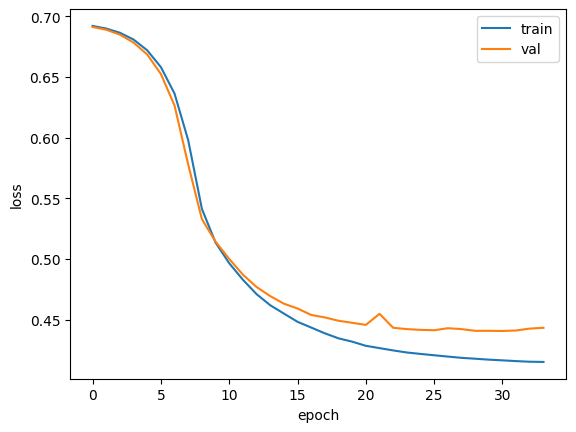

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 훈련 세트와 검증 세트 손실 그래프 출력

## 마무리

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)
# maxlen=100으로 설정하여 test_input의 길이를 100으로 맞춤
rnn_model = keras.models.load_model('best-2rnn-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

rnn_model.evaluate(test_seq, test_target)
# 테스트 세트 성능 출력

782/782 [==============================] - 6s 6ms/step - loss: 0.4484 - accuracy: 0.7886


[0.4484458565711975, 0.788640022277832]